In [294]:
from __future__ import print_function
import os
import sys
import time
import numpy as np
import pylab as pl
import cv2
import scipy.ndimage as nd
import matplotlib.pyplot as plt
#from skimage.filters import roberts, sobel, scharr, prewitt
from skimage import feature
from skimage import filters as skfl
from skimage.color import rgb2gray
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
def showme(image, ax=None, cmap=None):
    if ax is None:
        ax = pl.figure(figsize=(11,11)).add_subplot(111)

    if cmap is None:
        ax.imshow(image)
    else:
        ax.imshow(image, cmap=cmap)
    ax.axis('off')
    

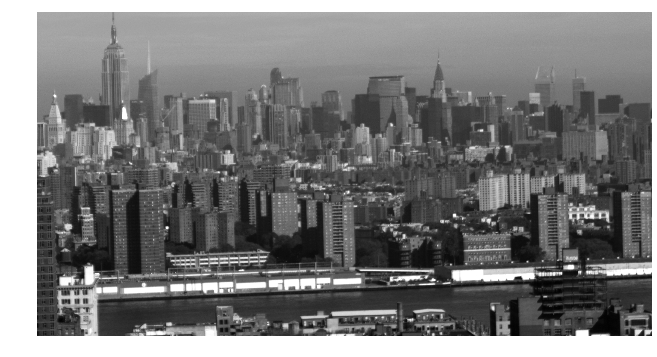

In [3]:
rawimg = np.fromfile("img1.raw", np.uint8)
#rawimg = rawimg.reshape([2160,4096,3])
imgsq = rawimg.astype(float)
imgsq *= 255 / imgsq.max()
img2d = (imgsq.reshape([2160,4096,3]).sum(2) / 3.)
img2d /= img2d.max()
#img2d = img2d.astype(float)
showme(img2d, cmap = 'gray')

In [4]:
smoothImg = nd.filters.gaussian_filter(img2d, [8, 8])
#showme(smoothImg)
#showme((img2d - smoothImg)**2)
#pl.savefig("smoothedDiff.png")

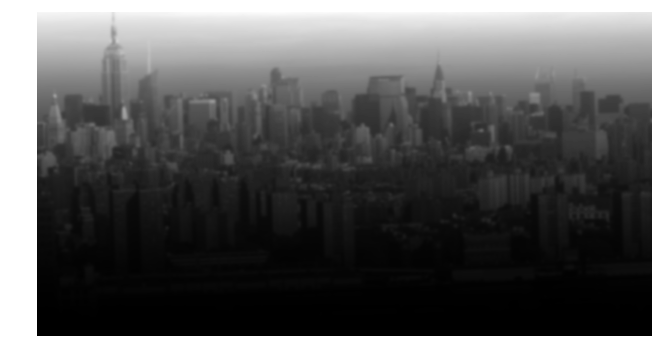

In [5]:
#skfl.sobel?
smoothImgEn = smoothImg[:,:] * (np.atleast_2d(np.linspace(1, 0, smoothImg.shape[0])).T)**2
#imgedge = skfl.sobel(smoothImgEn)
showme(smoothImgEn, cmap = 'gray')
#showme(imgedge, cmap = 'gray')

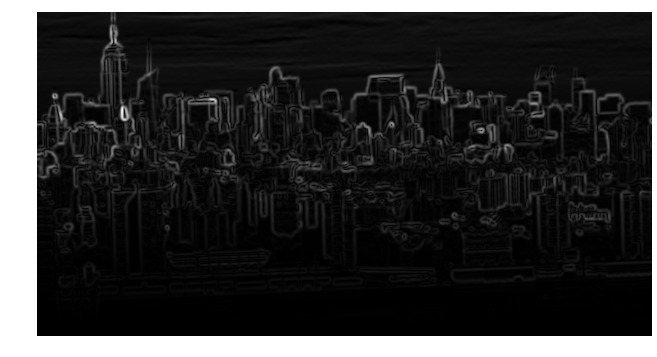

In [6]:
imgedge = skfl.sobel(smoothImgEn)
showme(imgedge, cmap = 'gray')

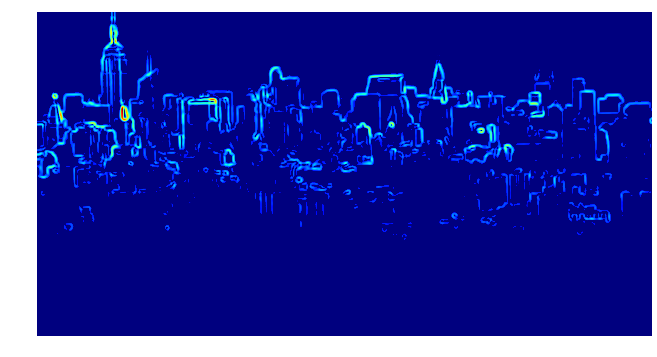

In [7]:
imgedge2 = imgedge.copy()
imgedge2[imgedge < 0.0025] = 0.0
showme(imgedge2)

In [315]:
#yTop = imgedge2.sort(0)
ymax = imgedge2.max(0)


envelope = [np.where(imgedge[:,i] == ymax[i])[0][-1] for i in range(cols)][1:]



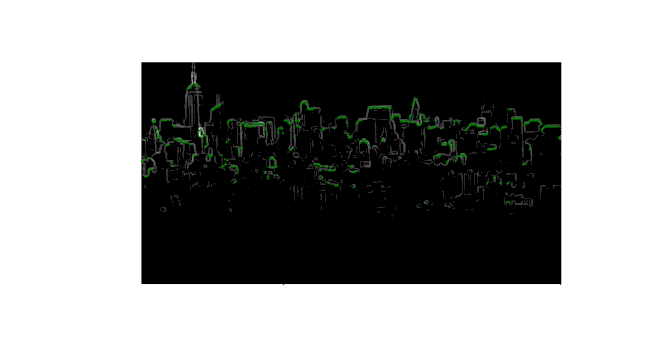

In [317]:
showme(imgedge2, cmap = 'gray')
pl.plot(np.arange(imgedge2.shape[1])[1:], envelope, 'g.', ms = 1.5)

In [77]:
#grad_max = []

#for i in range(cols):
#    grad = np.gradient(imgedge2[:,i])
#    grad_max.append(np.argpartition(grad, -10, axis = 0)[-10:].min())
#%timeit skyline()    

In [328]:
rows = imgedge2.shape[0]
cols = imgedge2.shape[1]

grad_1 = [np.argpartition(np.gradient(imgedge2[:, i]), -20)[-20:].min() for i in range(cols)]

grad_2 = [np.argsort(np.gradient(imgedge2[:, i]))[-20:].min() for i in range(cols)]

#grad_min = [np.argmin(np.gradient(imgedge2[:, i])) for i in range(cols)]


#%timeit grad_min

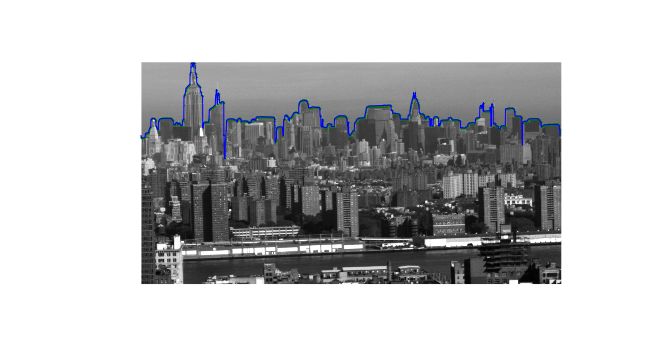

In [331]:
showme(img2d, cmap = 'gray')
plt.plot(np.arange(imgedge2.shape[1]), grad_1, 'g.', ms = 1.5)
plt.plot(np.arange(imgedge2.shape[1]), grad_2, 'b-', ms = 1.5)
#plt.plot(np.arange(imgedge2.shape[1]), grad_min, 'r.', ms = 1.5)
#plt.axhline(y = threshold)

In [234]:
a = np.gradient([0,36,58,2,5,88,5,2,4,5,6,8,3,5,90,5,3])

In [235]:
np.argsort(a)

array([15,  6,  3,  2, 16, 12, 11,  7, 14,  5,  9,  8, 10,  1,  0,  4, 13])

In [259]:
np.argpartition(-a, 5)[:5]
#np.partition(-a, 5)[5:]

array([ 1,  0, 13, 10,  4])

In [261]:
test = np.array(np.gradient([9,1,3,4,8,7,2,5,6,0]))

temp = np.argpartition(-test, 4)
result_args = temp[:4]

temp = np.partition(-test, 4)
result = -temp[:4]

In [327]:
result

array([ 2.5,  2. ,  1.5,  1.5])